# Harmonization Parameters Finder

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [40]:
def read_sensor_data(file_prefix, num_sensors=6):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'data/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

## Clean Data

In [41]:
def create_units_dict(df):
    units_dict = {}
    for column in df.columns:
        units_dict[column] = df.loc[0, column]
    return units_dict

units_dict = create_units_dict(sensor_dataframes[0])

In [42]:
def clean_sensor_dataframes(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'CO2', 'Barometric Pressure', 'VOC tVOC measurement',
                       'VOC Ethanol', 'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        sensor_df[numeric_columns] = sensor_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes = clean_sensor_dataframes(sensor_dataframes)

In [43]:
sensor_names = ['sensor01', 'sensor02', 'sensor03', 'sensor04', 'sensor05', 
                'sensor06']

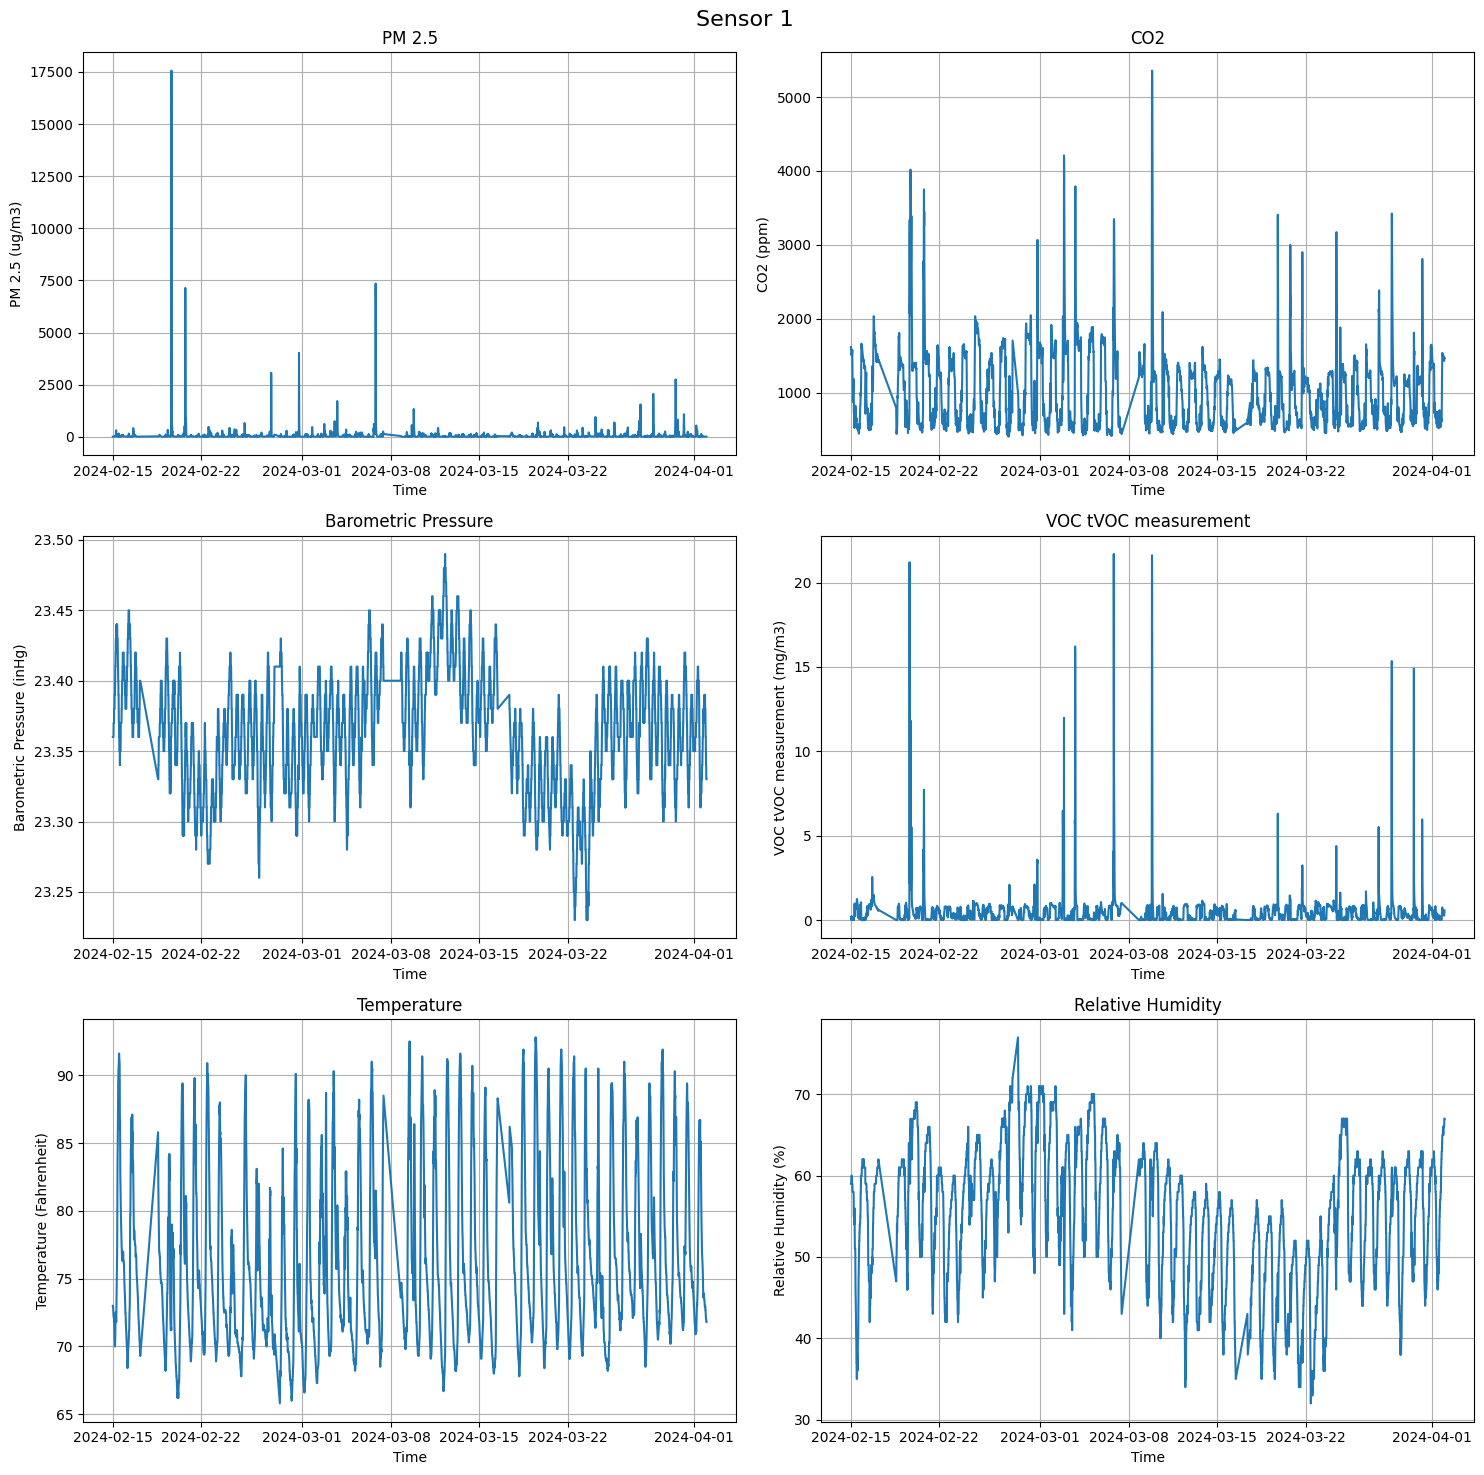

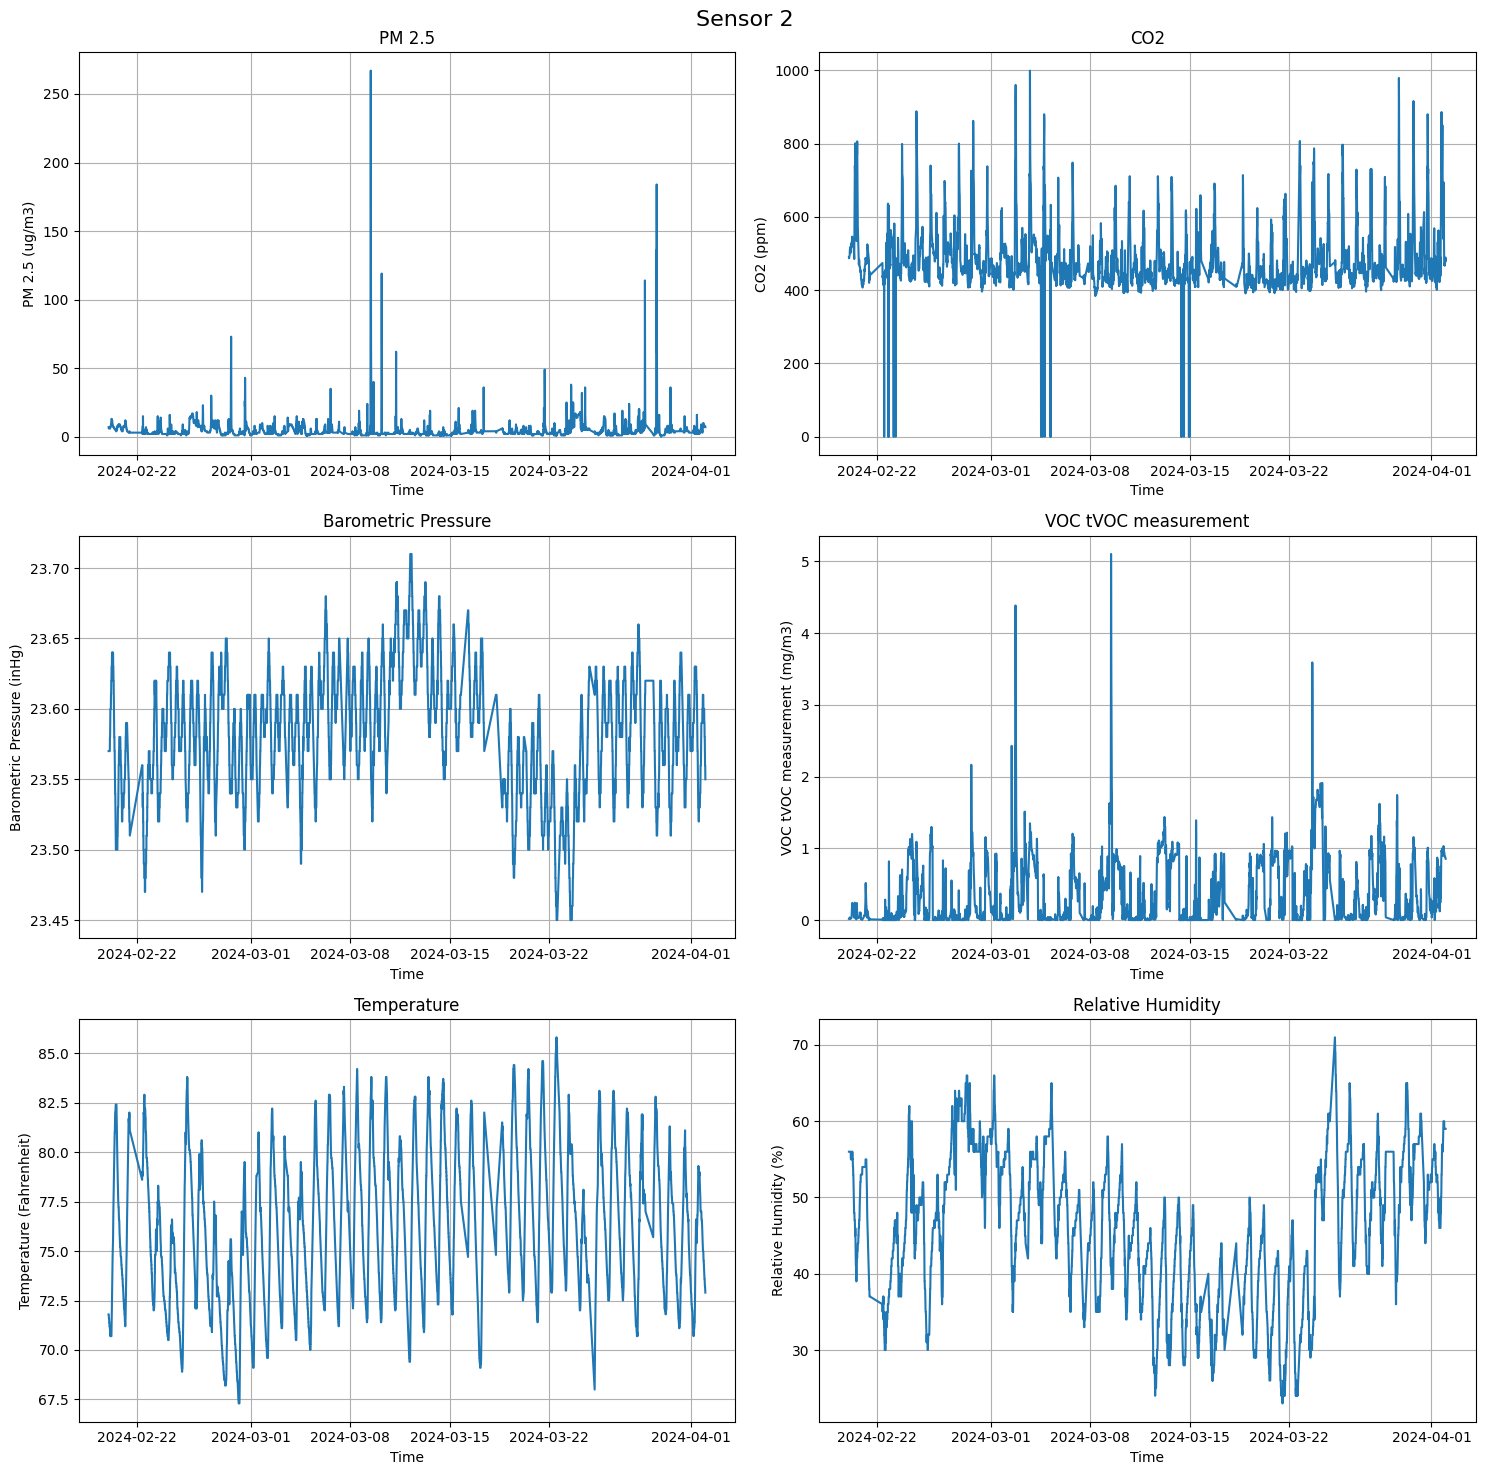

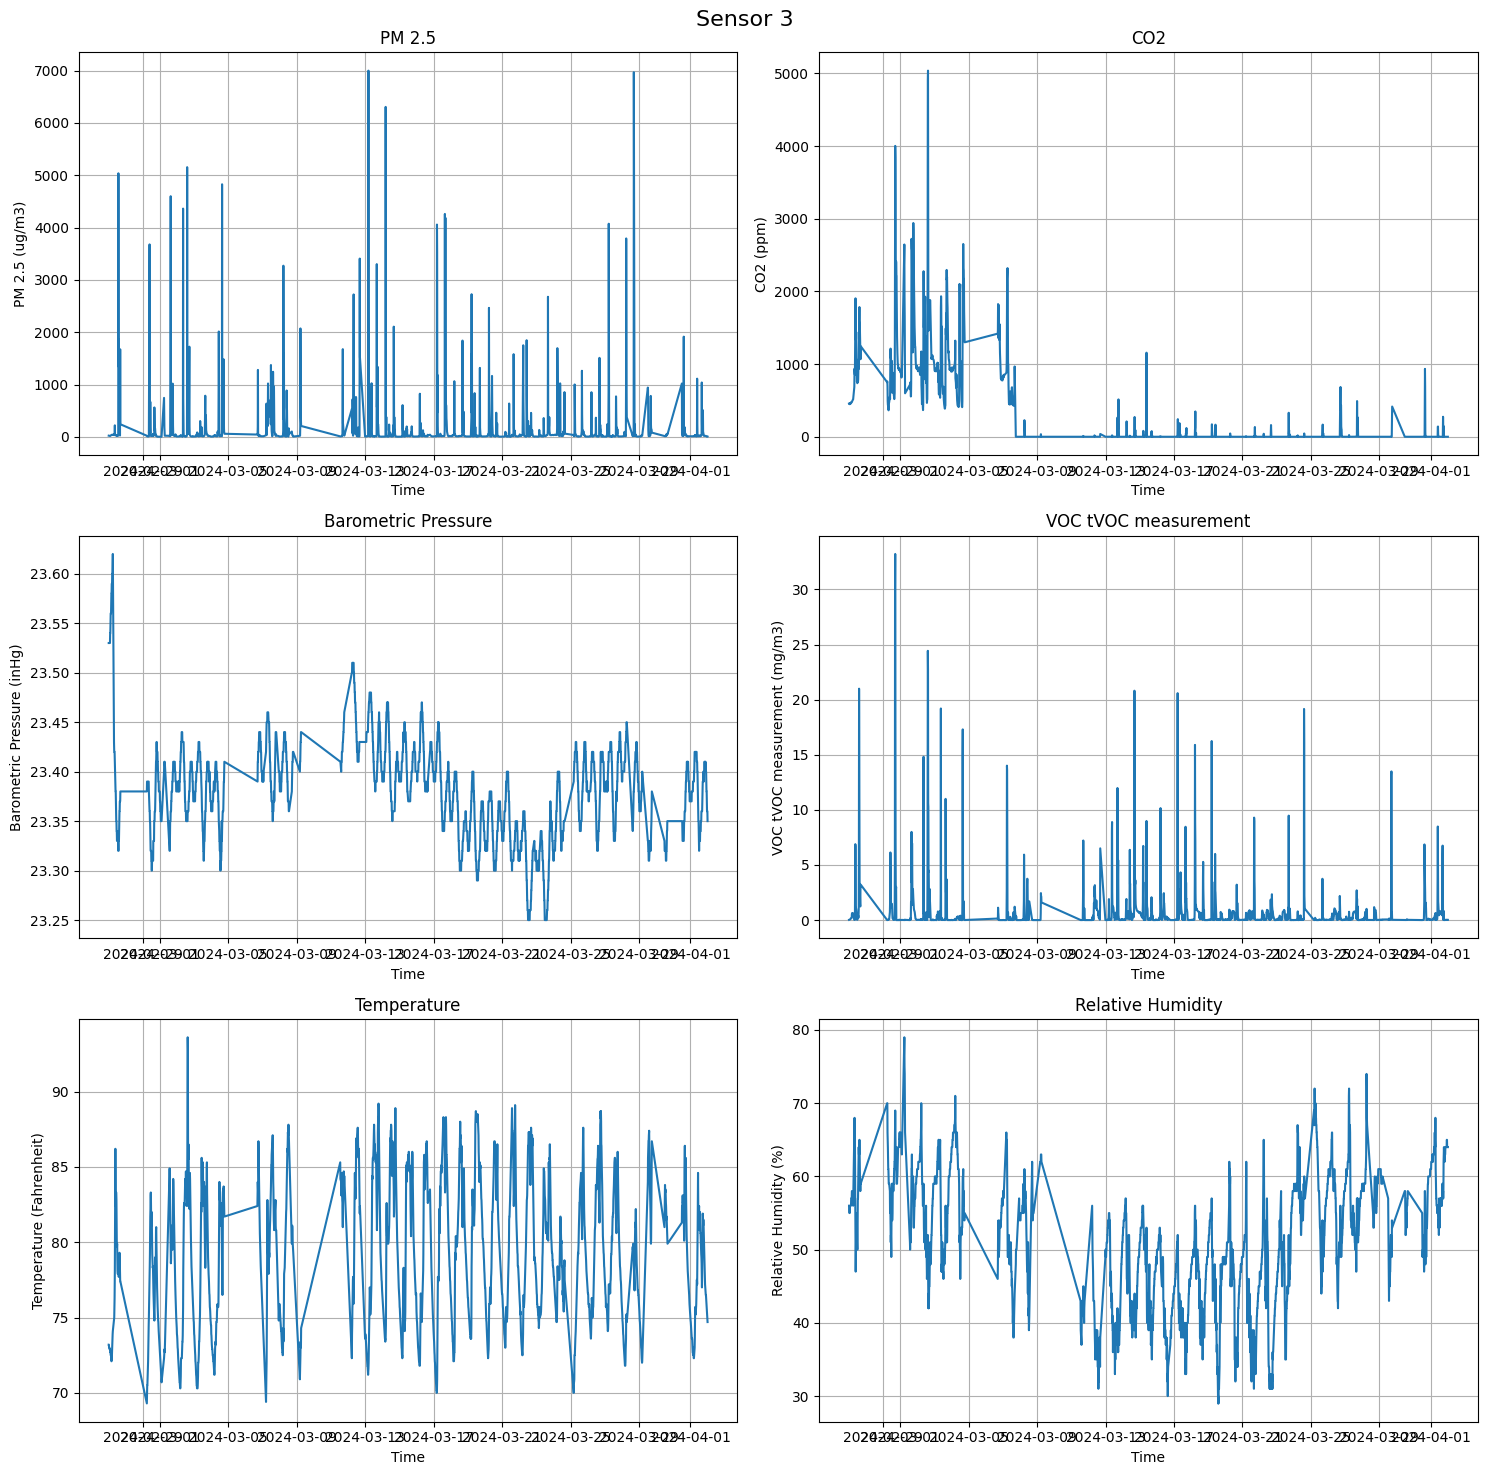

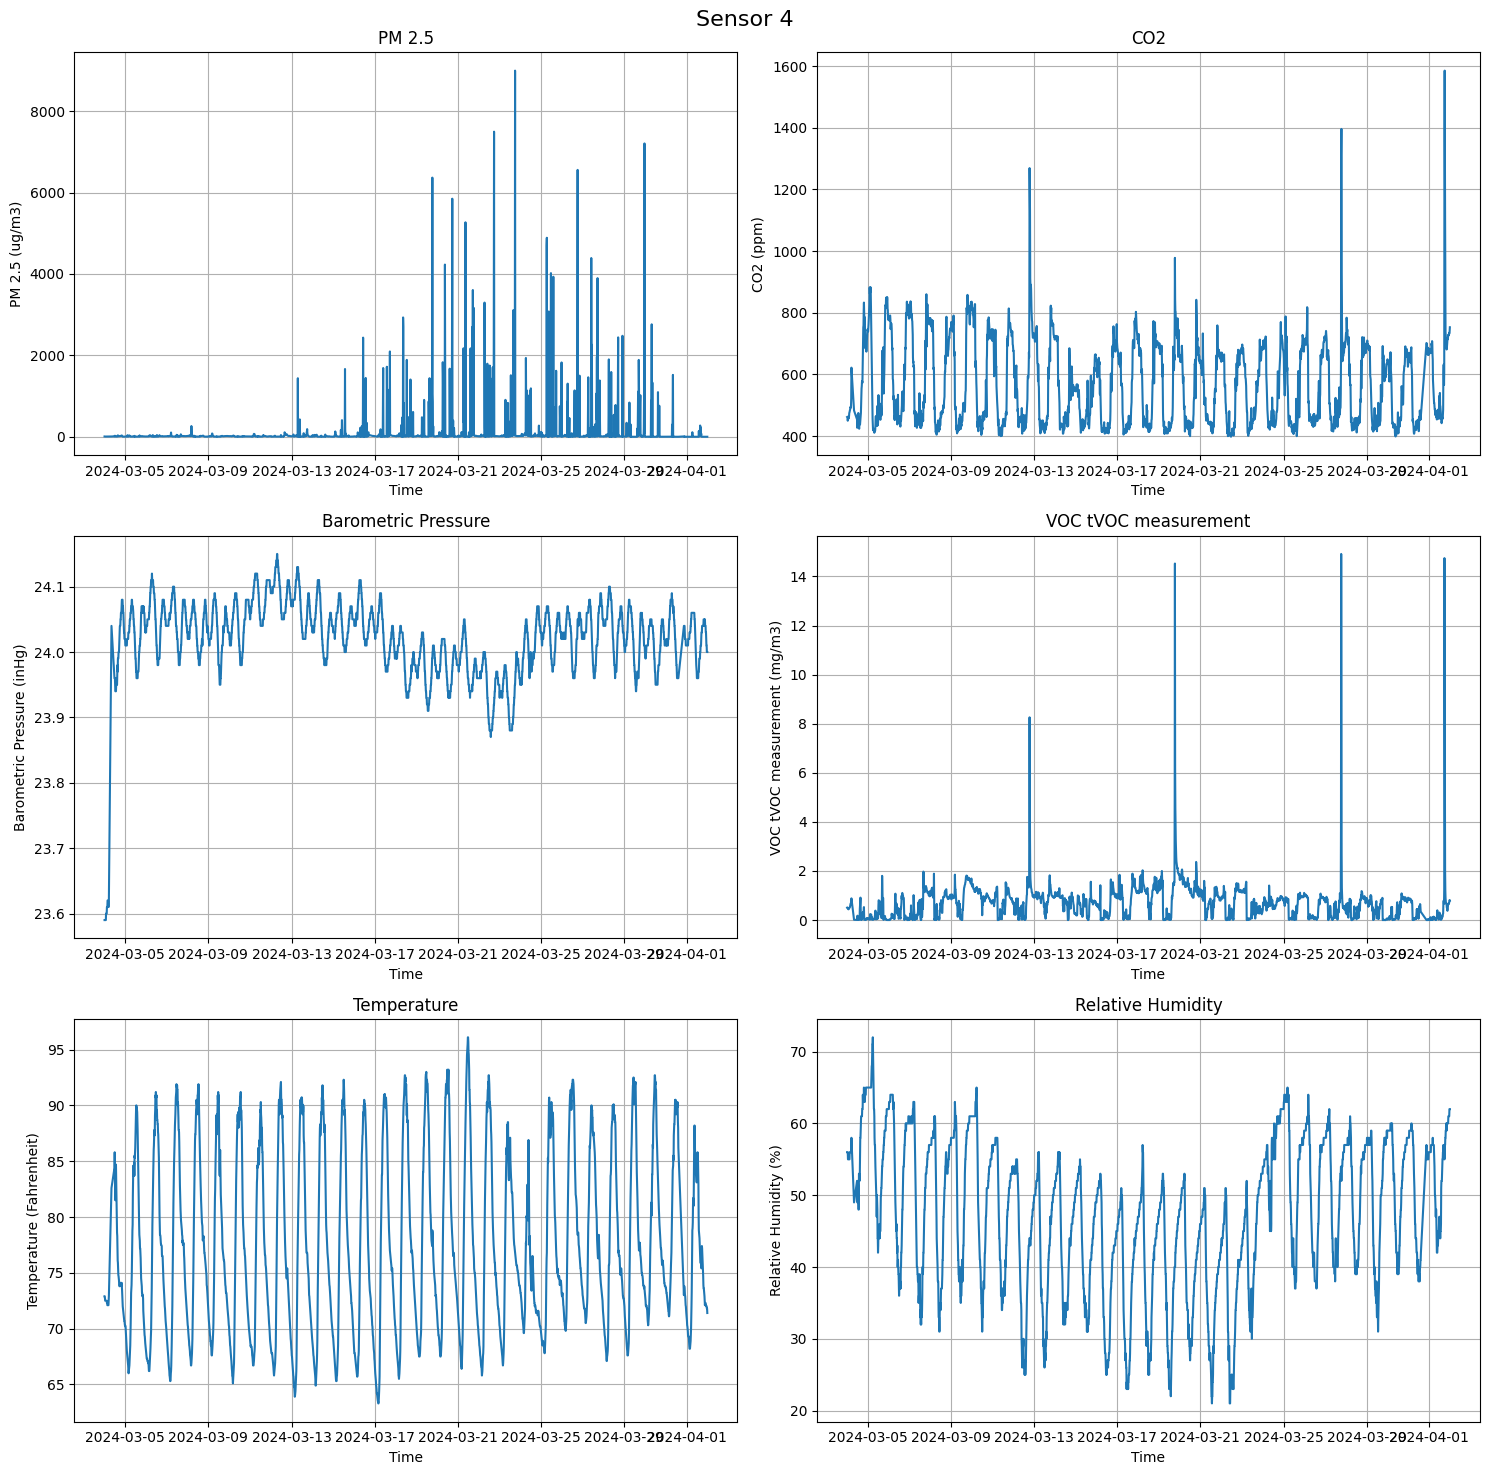

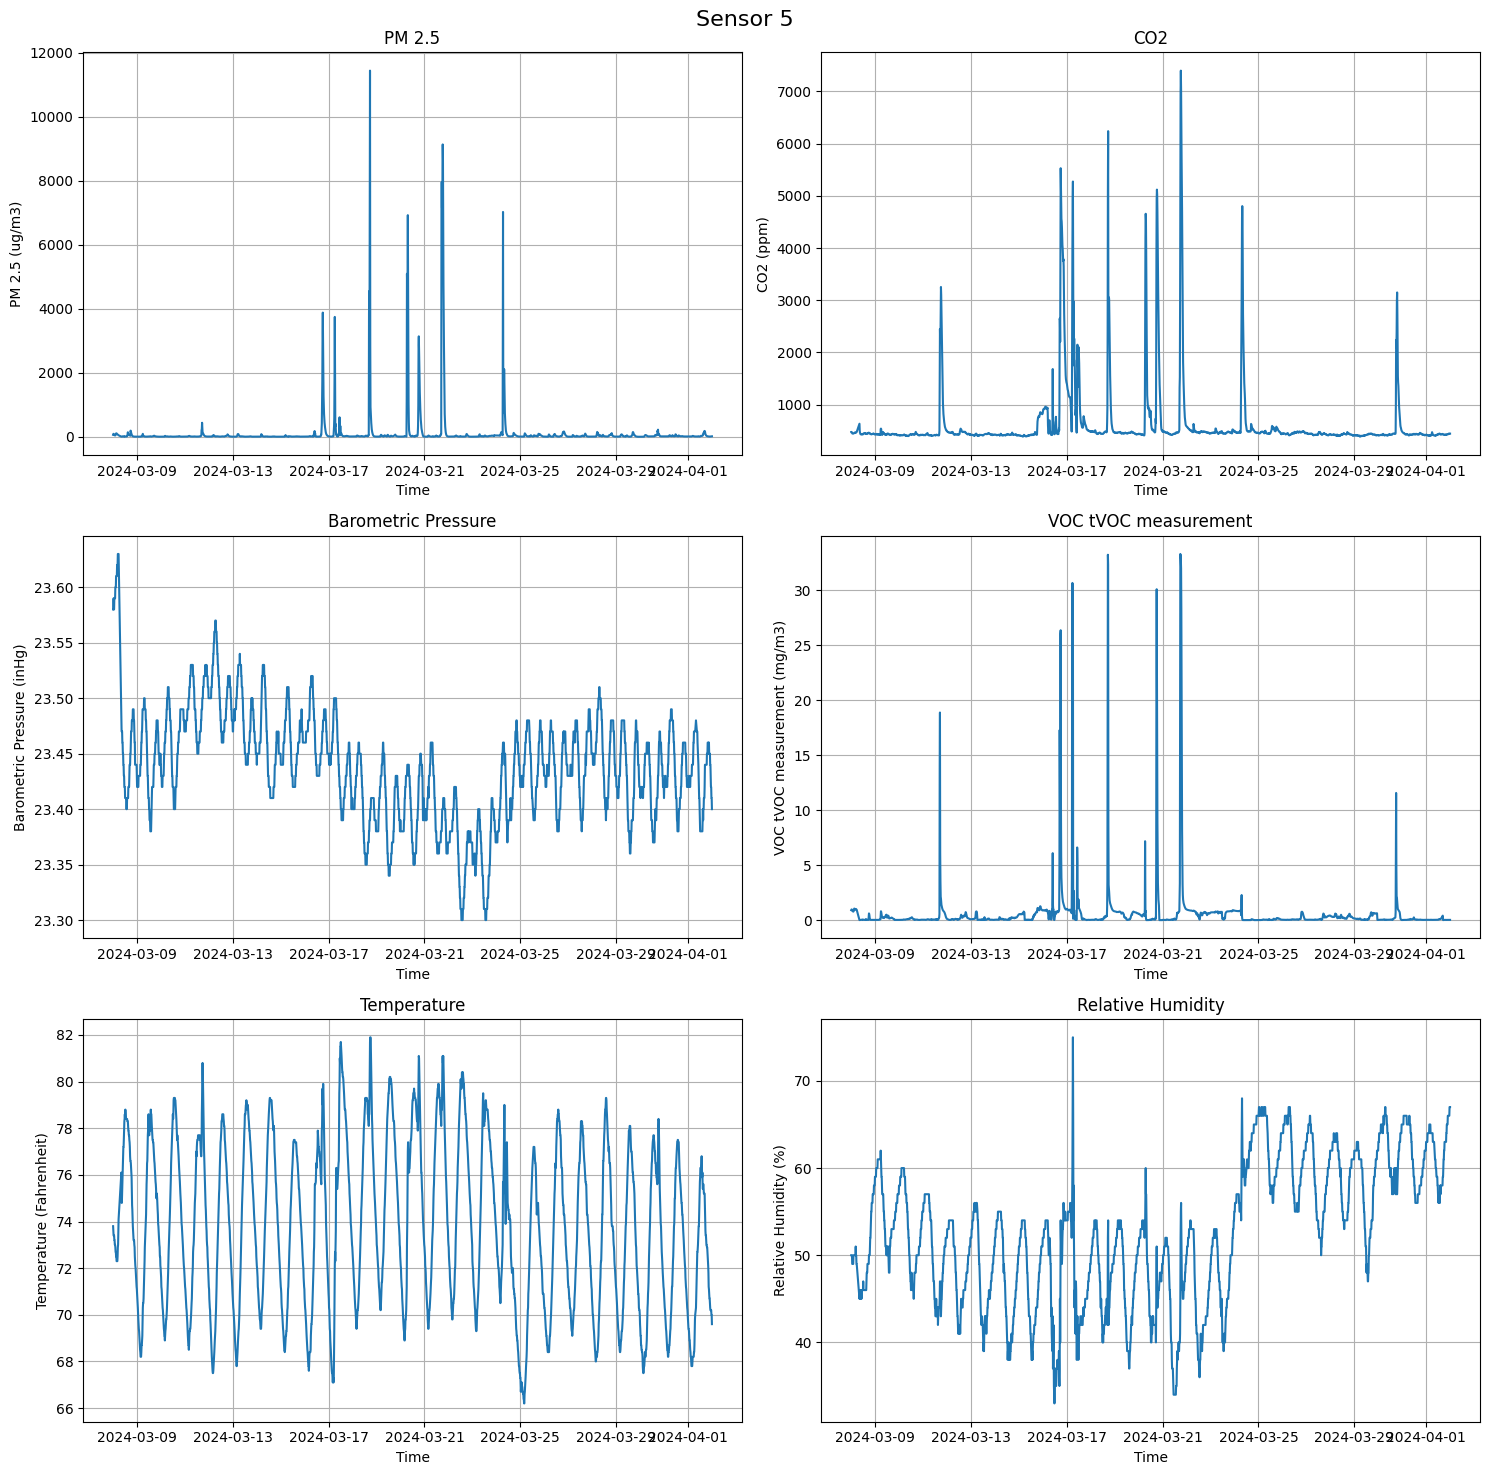

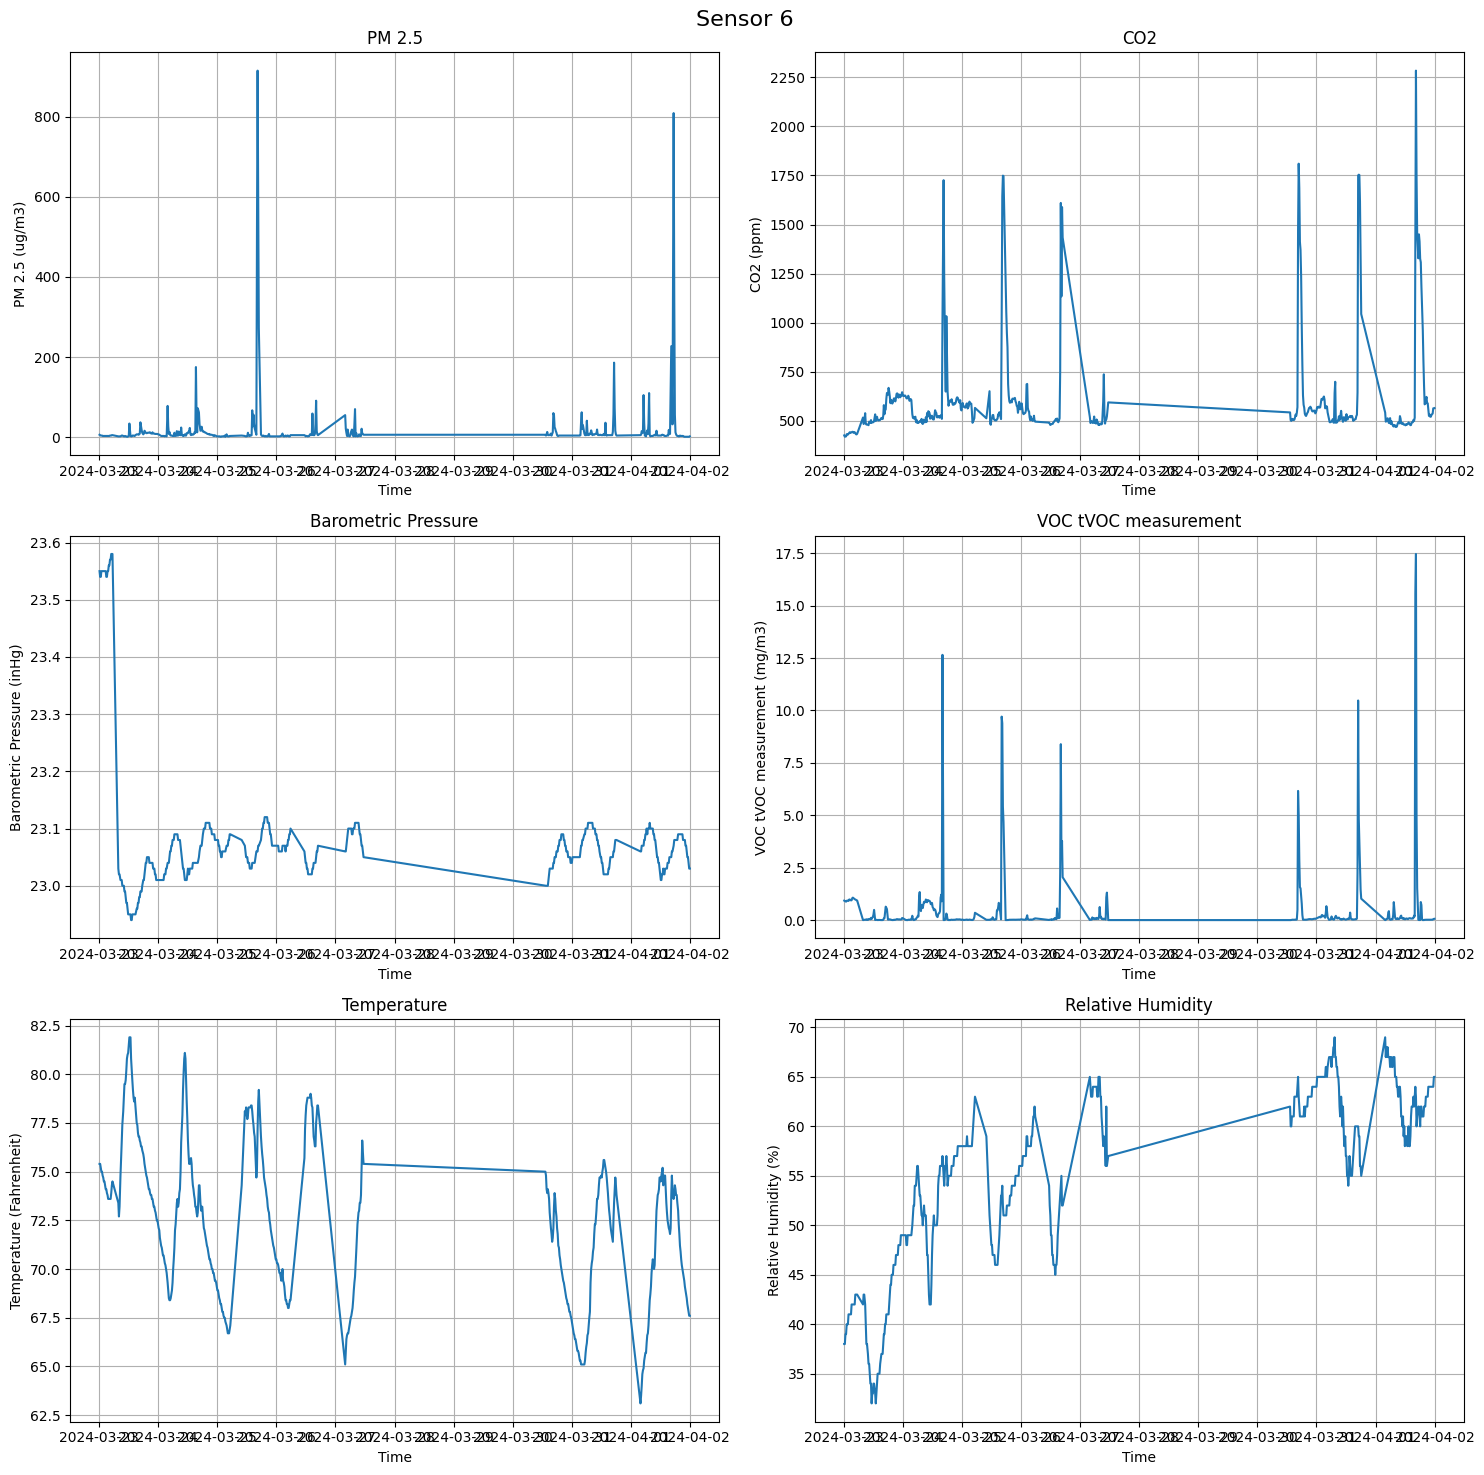

In [44]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes):
    num_columns = len(columns_to_plot)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(columns_to_plot):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

### Apply Harmonization

In [46]:
import os

parameters_dir = os.path.join("..", "Harmonization/parameters")

# Apply parameters to each dataframe and each column
for sensor_df in cleaned_sensor_dataframes:
    for column_name in ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']:
        coefficients_file = os.path.join(parameters_dir, f"{column_name.lower().replace(' ', '_')}_coefficients_df.csv")
        coefficients_df = pd.read_csv(coefficients_file)
        for index, row in coefficients_df.iterrows():
            sensor_df[column_name] = sensor_df[column_name] * row['Coefficient'] + row['Intercept']

### Plot

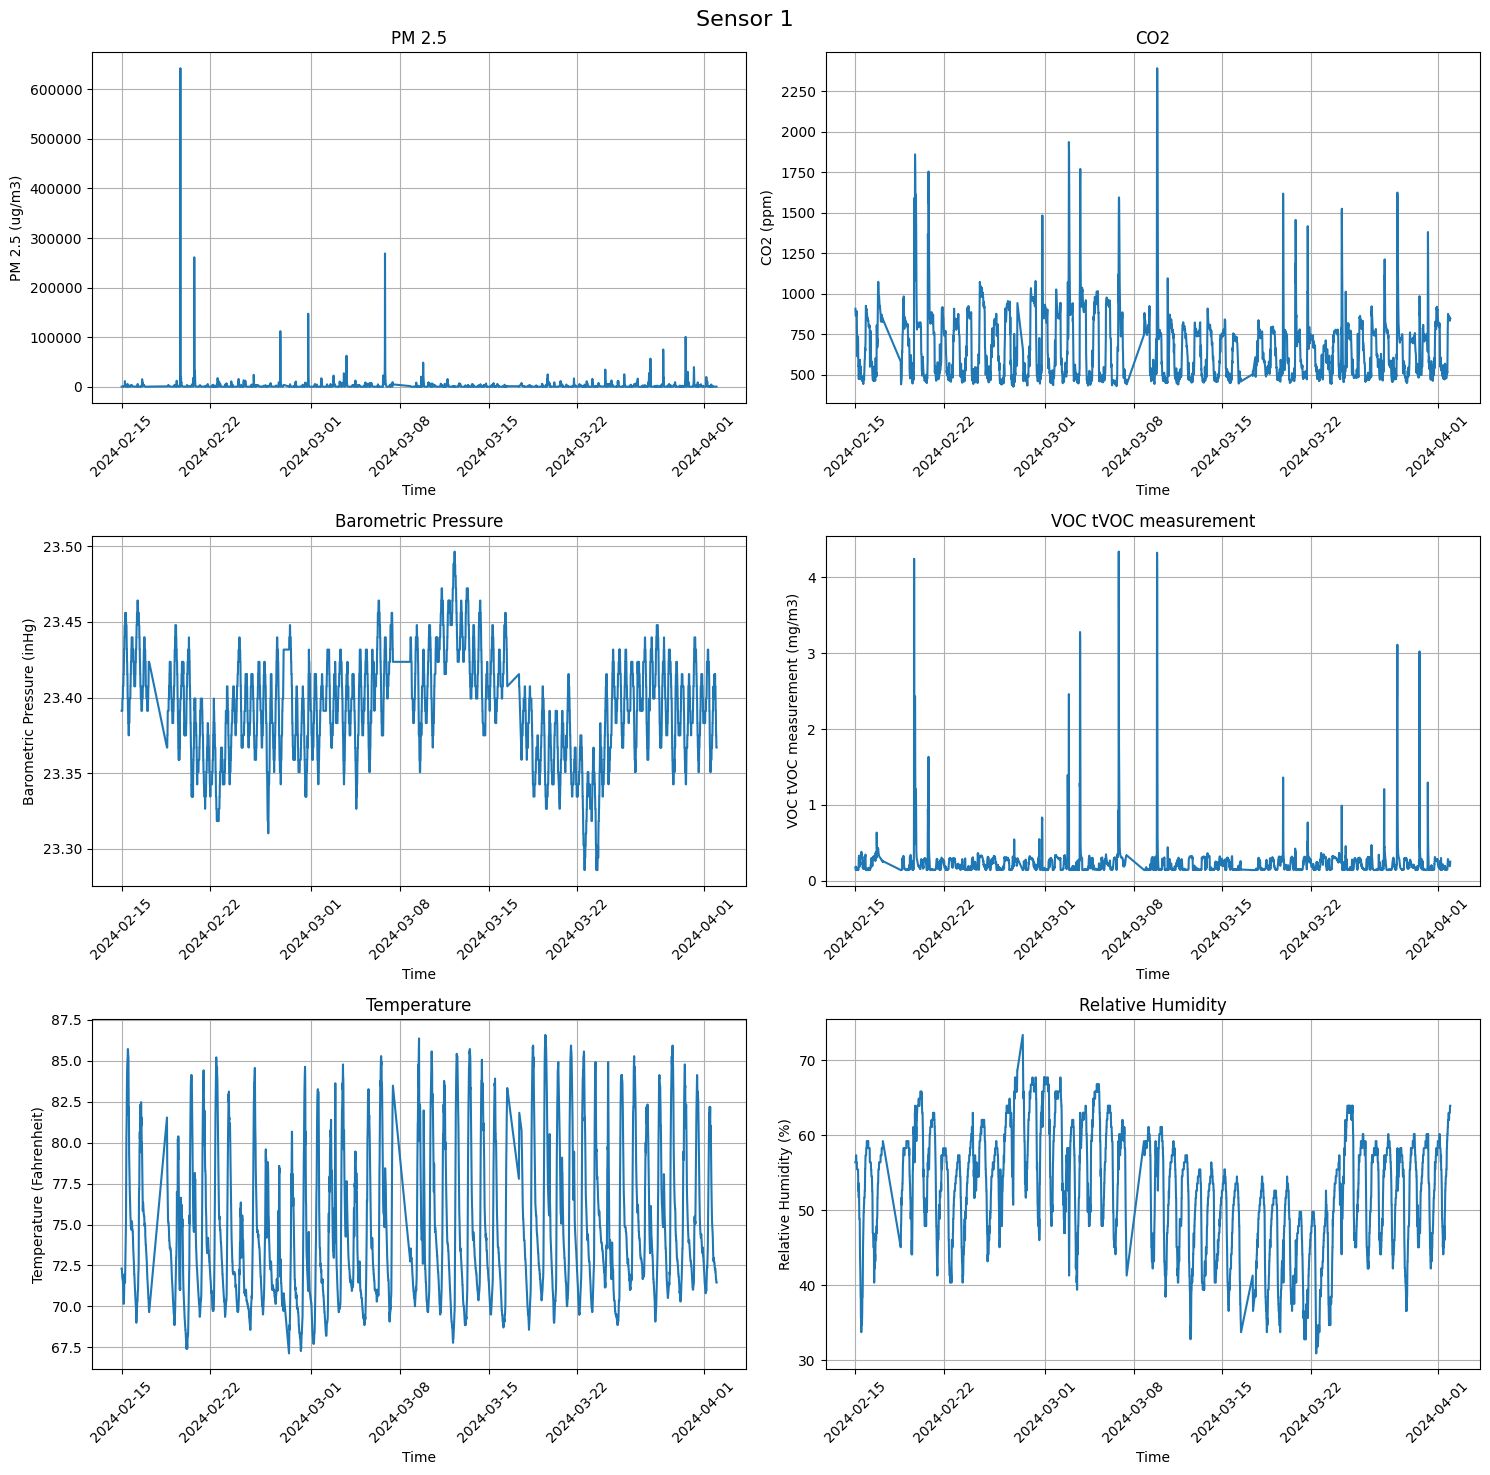

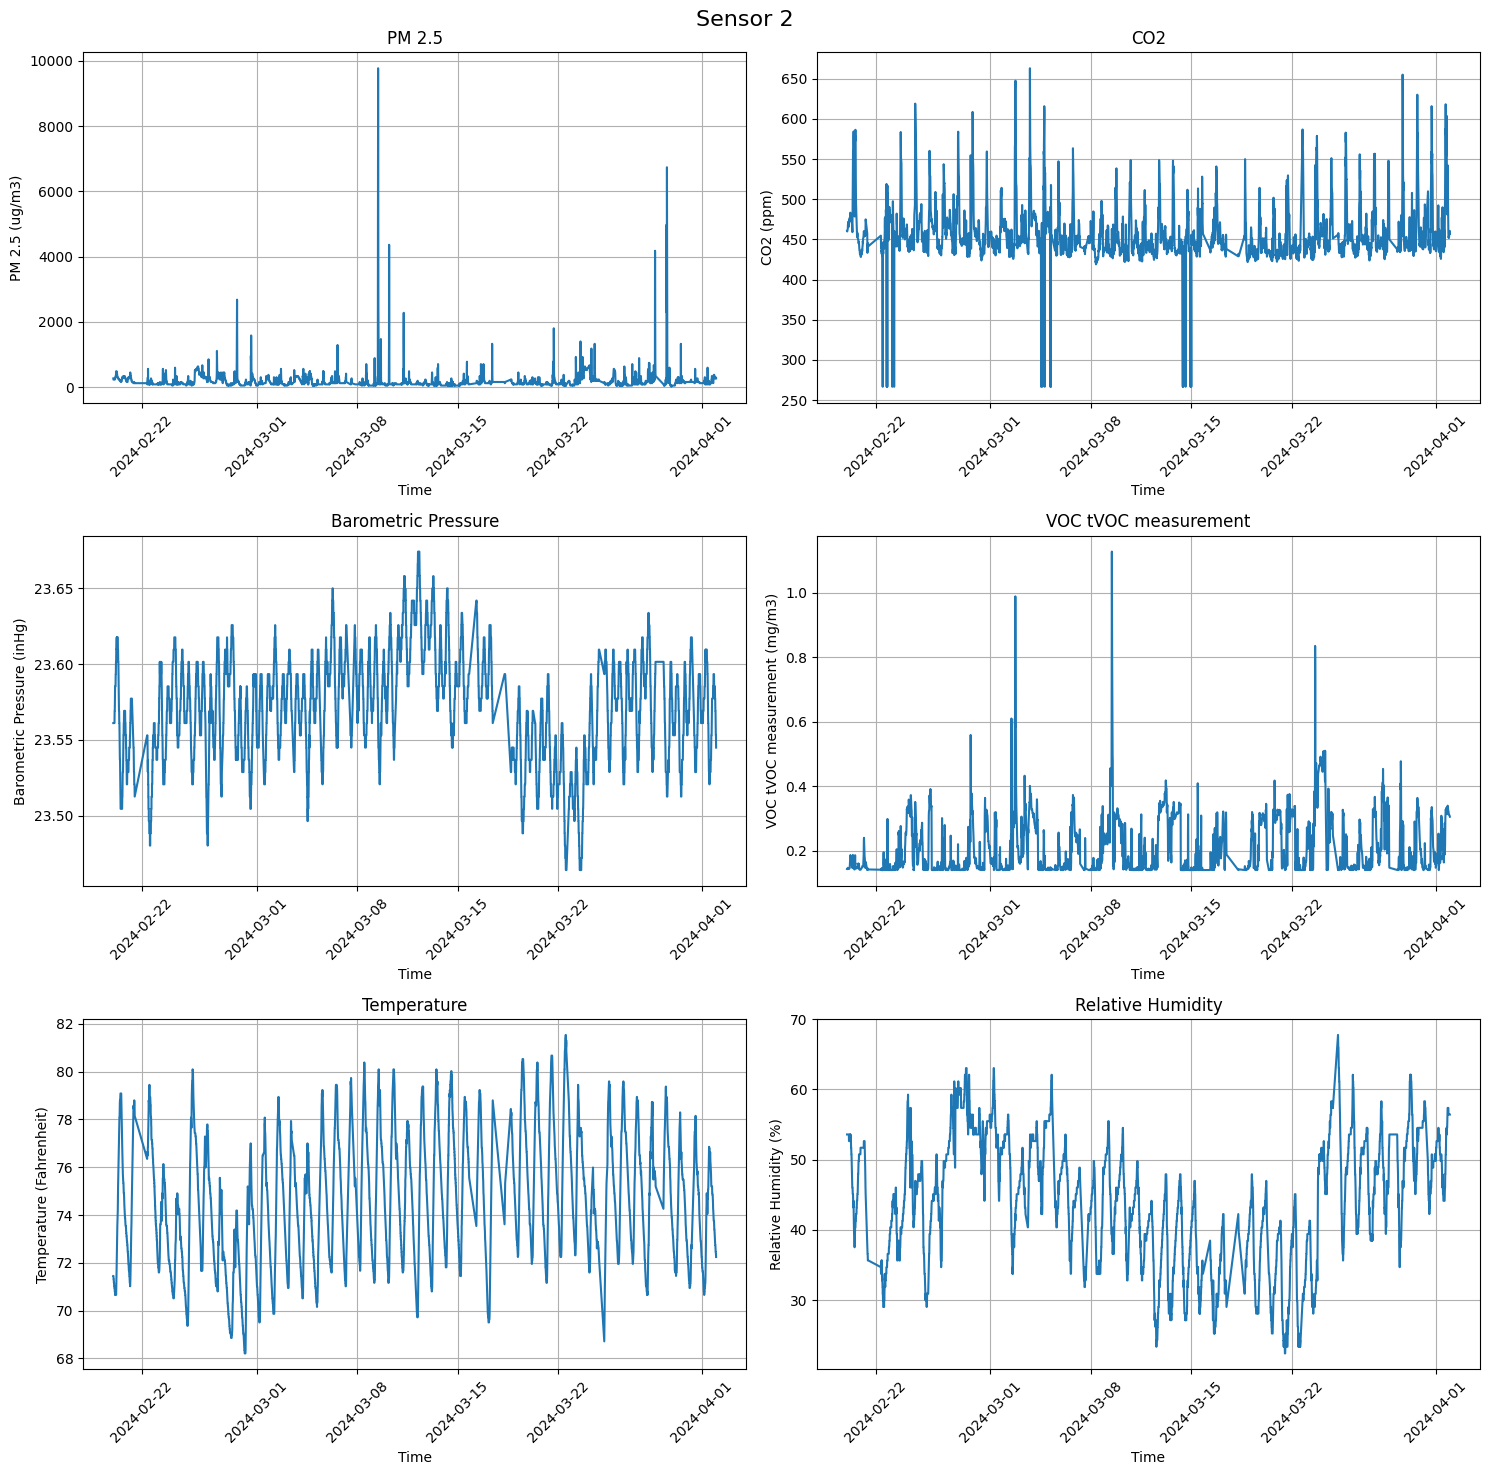

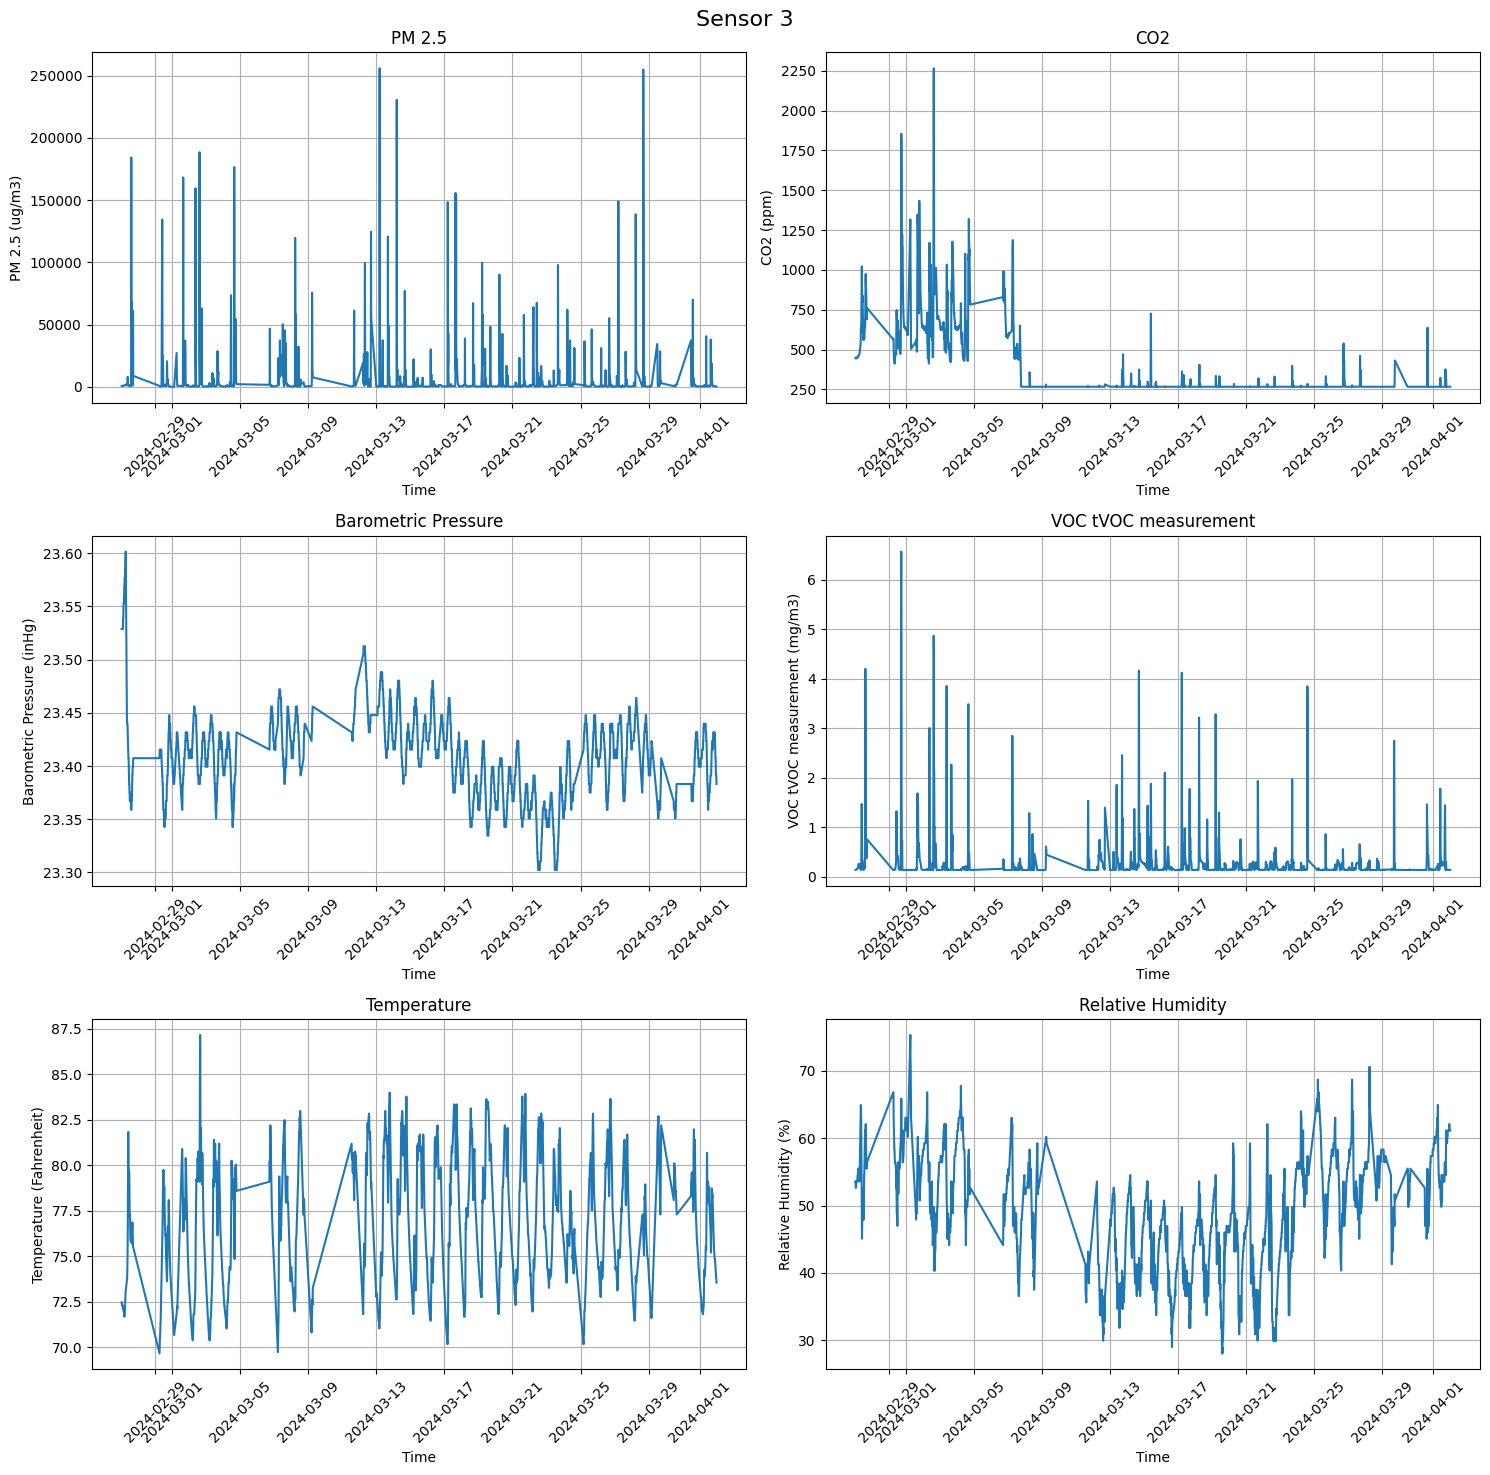

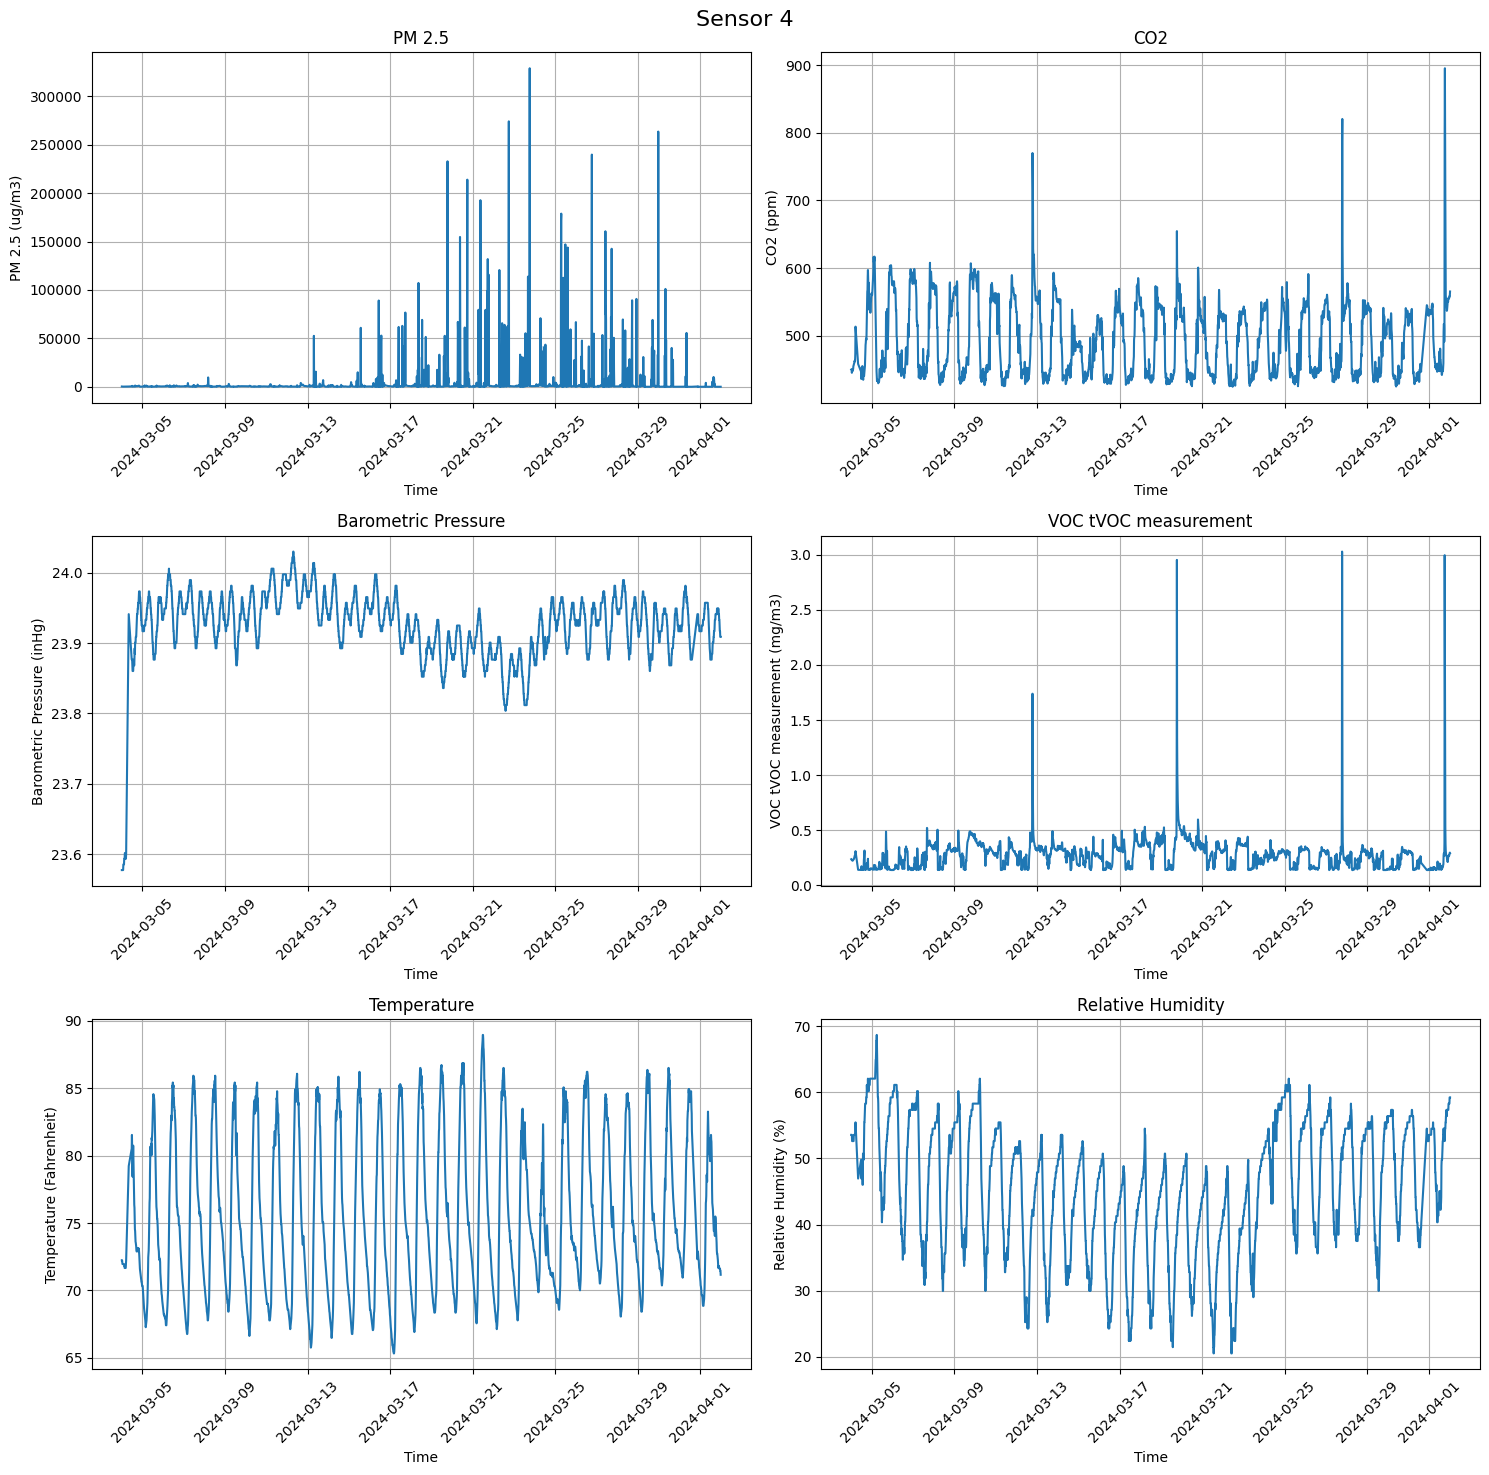

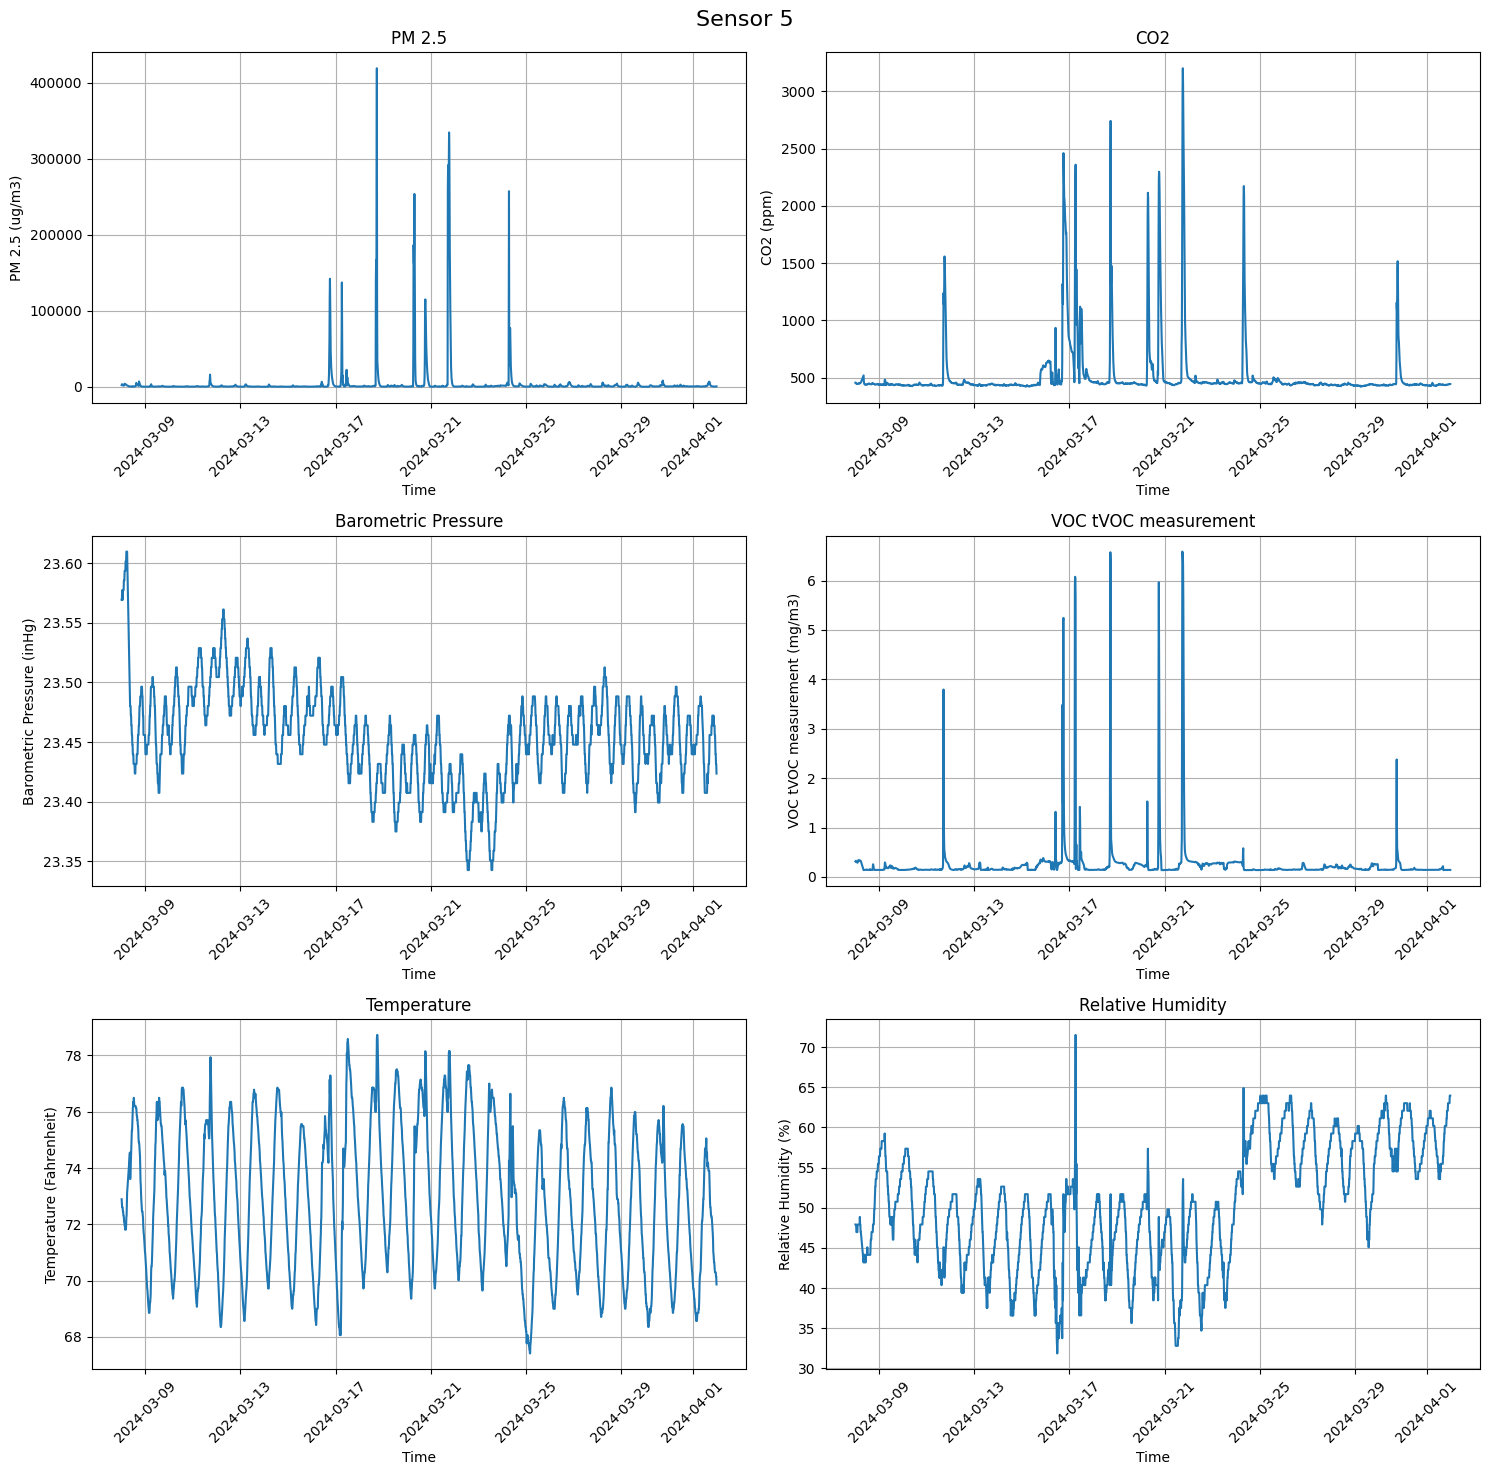

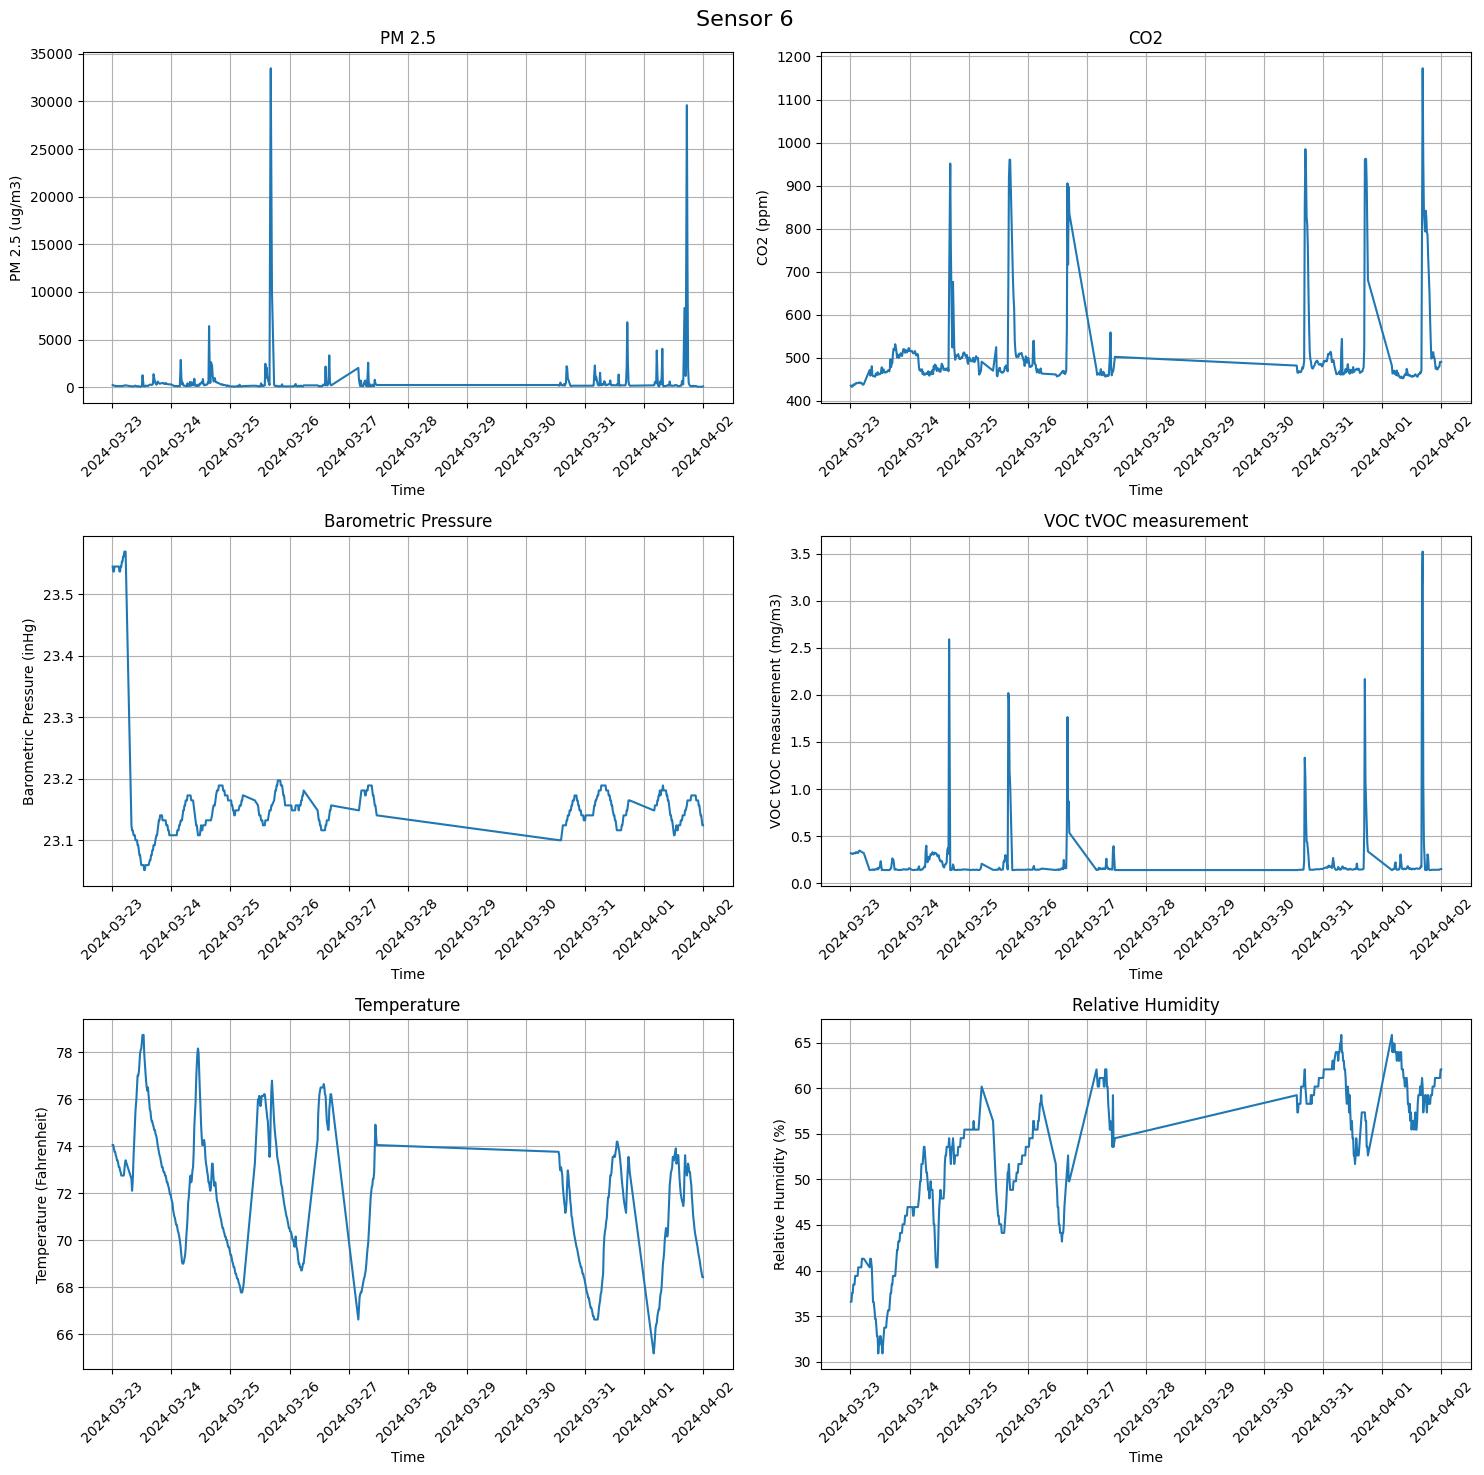

In [47]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes):
    num_columns = len(columns_to_plot)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(columns_to_plot):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()